In [3]:
import numpy as np
import pandas as pd
from sklearn.metrics import confusion_matrix
from astropy.io import ascii
from utils import col_names, relevant_indices, normalise_sdss_class
from scipy.stats import skew, kurtosis
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
datasets = "../datasets/SuperCOSMOS/"

In [3]:
%%time
uki823_df = ascii.read(datasets + "UKI823/sssedrpair.dat").to_pandas()
ukr823_df = ascii.read(datasets + "UKR823/sssedrpair.dat").to_pandas()
ukj823_df = ascii.read(datasets + "UKJ823/sssedrpair.dat").to_pandas()

CPU times: user 5.93 s, sys: 577 ms, total: 6.5 s
Wall time: 6.56 s


In [4]:
uki823_df.columns = col_names
ukr823_df.columns = col_names
ukj823_df.columns = col_names

In [ ]:
uki823_df[['CLASS', 'CLASS_SDSS']]
confusion_matrix(uki823_df['CLASS'], uki823_df['CLASS_SDSS'])

In [66]:
relevant_data = uki823_df.iloc[:,relevant_indices]
relevant_data.head(n=10)

,AREA,IPEAK,COSMAG,ISKY,A_U,B_U,THETA_U,A_I,B_I,THETA_I,...,"N(0,1)",PRFMAG,C_COSMAG,C_PRFMAG,RA_SDSS,DEC_SDSS,GMAG_SDSS,RMAG_SDSS,IMAG_SDSS,CLASS_SDSS
0,161,42793408,-22923,17532226,7978,6626,166,4944,4524,177,...,-777,-23019,15.639,14.998,359.763288,-1.067042,19.127230,17.637123,15.888538,6
1,46,5089298,-20025,18211806,4852,3506,128,4419,3052,133,...,4639,-20435,17.703,17.800,359.880409,-0.379610,19.122244,18.505545,18.302338,6
2,87,17260390,-21479,17841694,6028,4991,119,4327,3762,121,...,-51,-21669,16.723,16.460,359.929869,-0.616716,19.118631,17.716108,17.013582,6
3,57,7749678,-20599,18688688,4842,3961,120,3950,3318,119,...,-259,-20958,17.357,17.232,359.996295,-0.297037,19.114597,18.120455,17.692406,6
4,84,14814466,-21295,17692354,5907,4798,18,4325,3741,18,...,111,-21519,16.848,16.623,359.369486,-0.591688,19.112507,17.852146,17.173191,6
5,28,4578020,-19529,17461424,3900,3138,92,3169,2839,87,...,1855,-20142,18.031,18.118,359.191912,-1.025536,19.110334,18.468691,18.140358,6
6,25,2943244,-19062,17608646,3598,2640,119,3308,2400,119,...,3733,-19864,18.242,18.420,359.472978,-0.809460,19.109461,18.835291,18.621374,6
7,89,17744336,-21488,17834268,6084,5026,5,4501,3788,8,...,317,-21676,16.717,16.453,359.715553,-0.559928,19.109409,17.790117,17.041191,6
8,34,3258012,-19392,17575168,5064,2639,84,4639,2516,85,...,7347,-20065,18.033,18.202,359.497177,-0.993353,19.108807,18.767752,18.611248,6
9,32,2510266,-19216,17598236,4295,2940,164,3975,2772,168,...,6803,-19958,18.040,18.318,359.403277,-1.037557,19.101116,18.844725,18.717985,6


In [2]:
ukr823_df.head(n=10)

NameError: name 'ukr823_df' is not defined

In [ ]:
relevant_data.describe()

In [ ]:
#Find skewness and kurtosis of data
print('Skewness:\n{}'.format(skew(relevant_data)[:-1])) # Get rid of label column 
print('Kurtosis:\n{}'.format(kurtosis(relevant_data)[:-1])) # Get rid of label column

In [ ]:
#Plot all pair correlations
sns.pairplot(relevant_data,hue="CLASS_SDSS")

In [ ]:
#Empirical means and covariance matrix
mu_est = np.mean(relevant_data[:-1], axis=0)
C_est = np.cov(relevant_data[:-1], rowvar=False)
print("Estimated mean:\n{}".format(mu_est))
print("Estimated covariance matrix:\n{}".format(C_est))

In [21]:
#Implementing PCA from sci-kit learn - lab exercise
from sklearn.decomposition import PCA
pca = PCA(n_components=4).fit(relevant_data[:-1])
pc_scores = pca.transform(relevant_data[:-1])
print(pca.components_.T)

[[ 8.33094600e-06 -1.22449978e-05  3.27552693e-02  7.31920677e-02]
 [ 9.99999953e-01 -1.06970157e-04 -1.23662983e-04 -2.40934453e-04]
 [-9.92054230e-05 -1.03659876e-05 -6.91330553e-02 -9.21247358e-02]
 [-1.06993688e-04 -9.99999944e-01 -1.55224259e-04 -3.34574743e-05]
 [ 1.54016444e-04 -1.06113573e-04  4.48572761e-01  4.40241957e-01]
 [ 1.55817968e-04 -2.04558372e-05  3.06413878e-01  4.87767451e-01]
 [-4.39318057e-07 -2.78623670e-06  2.51729754e-04  7.34074848e-04]
 [ 6.85180977e-05 -1.05866419e-04  3.22944267e-01  2.00984696e-01]
 [ 8.25991492e-05 -3.46607058e-05  2.07093512e-01  2.68379854e-01]
 [-7.85200503e-07 -3.29763474e-06  2.00604733e-04  4.82781629e-04]
 [ 1.65858850e-09 -1.21193962e-08  1.20102468e-05  7.23055246e-06]
 [ 4.04932142e-07 -4.18124083e-05  1.66568270e-03  6.89816043e-04]
 [-6.26584746e-05 -8.16989112e-05  7.39250856e-01 -6.55282263e-01]
 [-9.24182502e-05 -6.73487194e-07 -7.32466806e-02 -1.12279897e-01]
 [-6.63310991e-08 -3.97815103e-08 -5.01381159e-05 -4.55340118e

In [ ]:
#Check shape of pca components
np.shape(pca.components_.T)

In [16]:
#Performing proper PCA - from Jack
data_x=relevant_data.iloc[:,:-1]
data_y=relevant_data['CLASS_SDSS']

In [19]:
#Scatter plot function
def scatter_2d_label(X_2d, y, s=2, alpha=0.5, lw=2):
    """Visualuse a 2D embedding with corresponding labels.
    
    X_2d : ndarray, shape (n_samples,2)
        Low-dimensional feature representation.
    
    y : ndarray, shape (n_samples,)
        Labels corresponding to the entries in X_2d.
        
    s : float
        Marker size for scatter plot.
    
    alpha : float
        Transparency for scatter plot.
        
    lw : float
        Linewidth for scatter plot.
    """
    targets = np.unique(y)
    colors = sns.color_palette(n_colors=targets.size)
    for color, target in zip(colors, targets):
        plt.scatter(X_2d[y == target, 0], X_2d[y == target, 1], color=color, label=target, s=s, alpha=alpha, lw=lw)

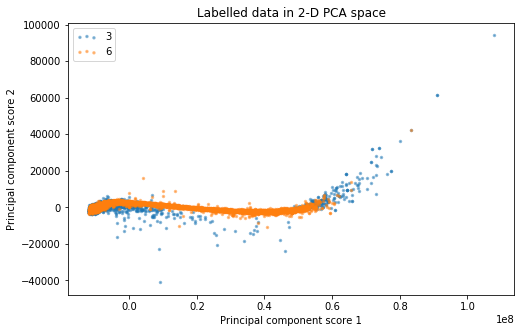

In [25]:
#PCA performance and plotting
dim_1 = 0# First dimension
dim_2 = 3 # Second dimension
X_pca_4d = PCA(n_components=4).fit_transform(data_x) # Initialise a PCA instance, fit it by using X_sc and then transform X_sc
plt.figure(figsize=(8,5))
scatter_2d_label(X_pca_4d[:, [dim_1,dim_2]], data_y)
plt.title('Labelled data in 2-D PCA space')
plt.xlabel('Principal component score 1')
plt.ylabel('Principal component score 2')
plt.legend(loc='best', scatterpoints=3) # Ask matplotlib to place the legend where it thinks best
plt.show()

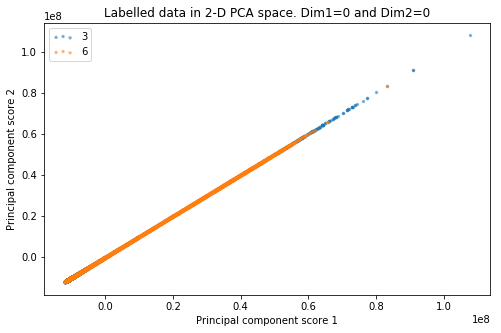

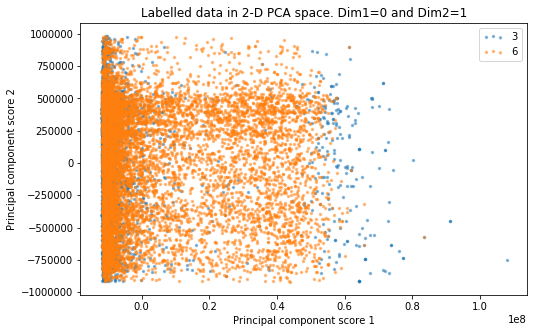

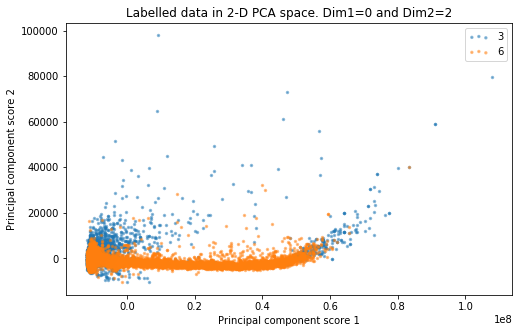

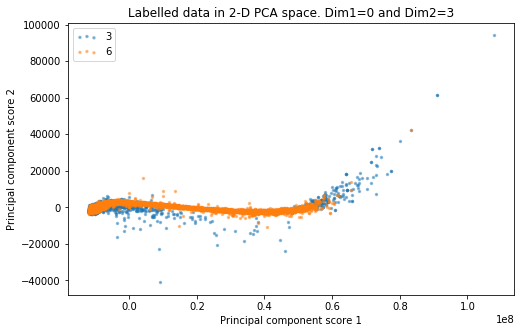

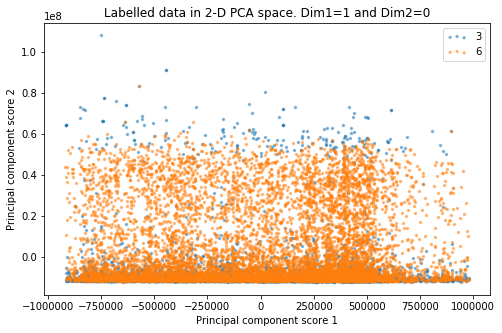

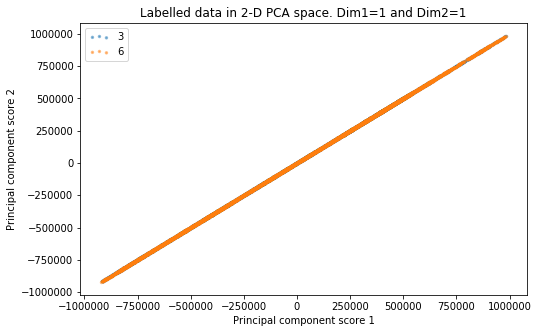

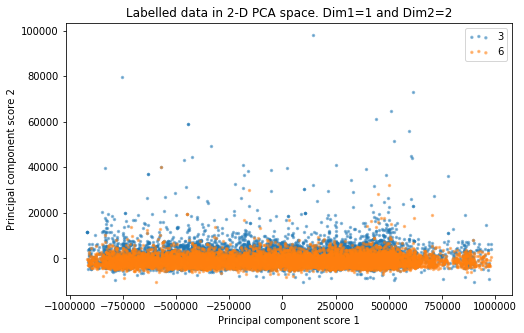

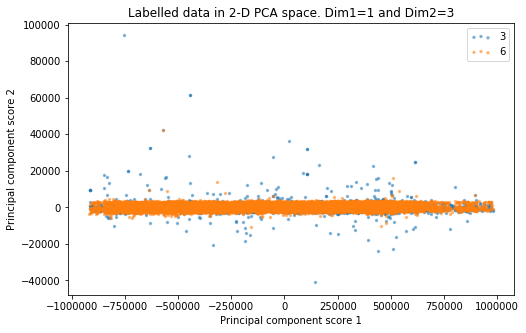

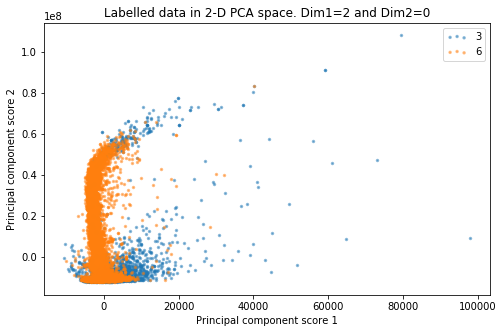

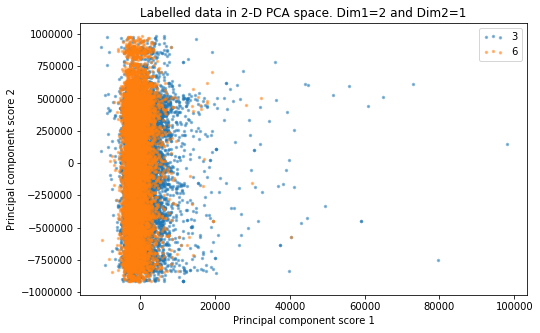

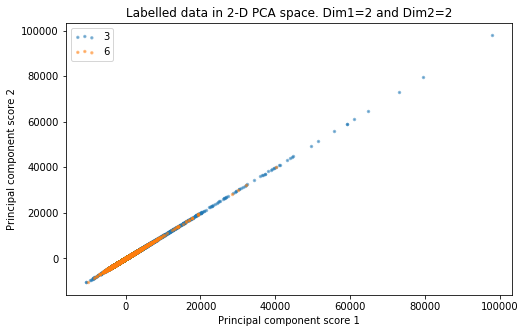

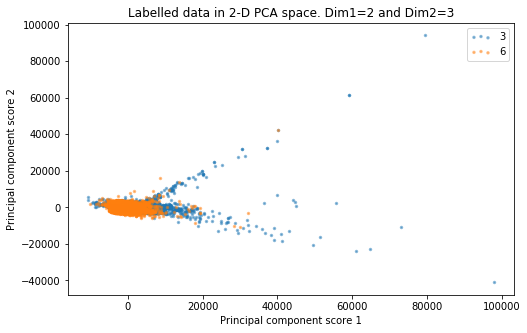

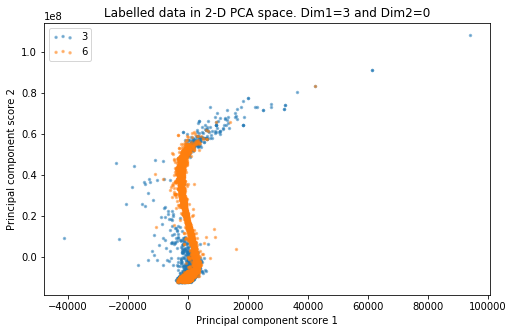

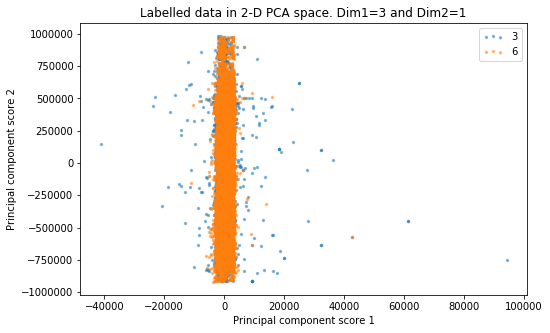

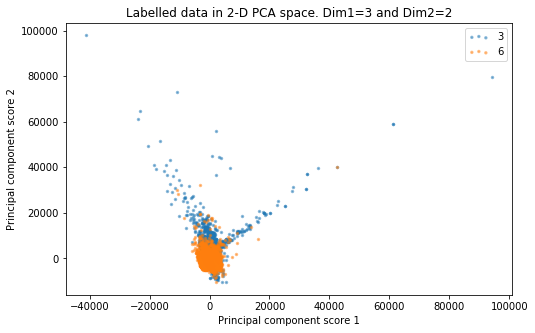

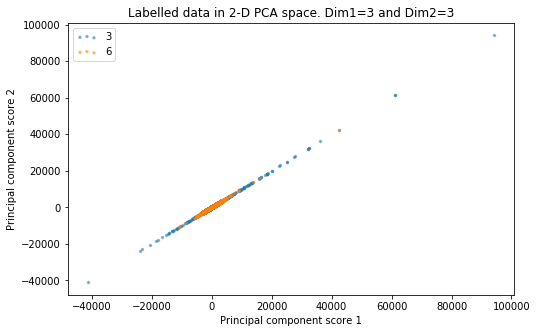

In [27]:
#Plotting all combinations of dimensions. When Dim1=Dim2 the graph is pointless as its just plotting the same dimension against itself
for i in range(4):
    for j in range(4):
        dim_1 = i
        dim_2 = j
        plt.figure(figsize=(8,5))
        scatter_2d_label(X_pca_4d[:, [dim_1,dim_2]], data_y)
        plt.title('Labelled data in 2-D PCA space. Dim1='+str(dim_1)+' and Dim2='+str(dim_2))
        plt.xlabel('Principal component score 1')
        plt.ylabel('Principal component score 2')
        plt.legend(loc='best', scatterpoints=3) # Ask matplotlib to place the legend where it thinks best
        plt.show()

In [59]:
#Split dataset into train, val, test
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import log_loss
X_train,X_test,y_train,y_test = train_test_split(data_x,data_y,test_size=0.1,random_state=42)
X_train,X_val,y_train,y_val = train_test_split(X_train,y_train,test_size=2./9,random_state=42)

sc = StandardScaler().fit(X_train)
X_train_sc = sc.transform(X_train)
X_val_sc = sc.transform(X_val)
X_test_sc = sc.transform(X_test)

random_state = 42

/anaconda3/lib/python3.7/site-packages/sklearn/preprocessing/data.py:625: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:9: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  if __name__ == '__main__':
/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:10: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  # Remove the CWD from sys.path while we load stuff.
/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:11: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  # This is added back by InteractiveShellApp.init_path()


In [68]:
# Your code goes here
from sklearn.linear_model import LogisticRegression
from sklearn.neural_network import MLPClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.gaussian_process import GaussianProcessClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.gaussian_process.kernels import RBF
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis, QuadraticDiscriminantAnalysis
from sklearn.metrics import f1_score,roc_auc_score

names = ["Logistic Regression", "Nearest Neighbors", "Linear SVM", "RBF SVM",
         "Decision Tree", "Random Forest", "Neural Net (Multi-layer perceptron)",
         "Naive Bayes", "LDA", "QDA"]
classifiers = [
    LogisticRegression(),
    KNeighborsClassifier(n_neighbors=9),
    SVC(kernel="linear", probability=True, random_state=random_state),
    SVC(kernel='rbf', probability=True, random_state=random_state),
    DecisionTreeClassifier(max_depth=10),
    RandomForestClassifier(max_depth=10, n_estimators=50,random_state=random_state),
    MLPClassifier(random_state=random_state),
    GaussianNB(),
    LinearDiscriminantAnalysis(),
    QuadraticDiscriminantAnalysis()]

ca_score = {} # Classification accuracy
ce_score = {} # Cross-entropy
F1_scores = {} #F1 scores

for name, clf in zip(names, classifiers):
    clf.fit(X_train_sc, y_train)
    ca_score[name] = clf.score(X_val_sc, y_val)
    ce_score[name] = log_loss(y_val, clf.predict_proba(X_val_sc))
    F1_scores[name] = f1_score(y_val,clf.predict(X_val_sc),average='macro')
    
print('Classification performance on validation set:')
for clf in names:
    print ("{}, accuracy: {:.3f}, log-loss: {:.3f}, f1-score: {:.3f}".format(clf, ca_score[clf], ce_score[clf],F1_scores[clf]))

/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


Classification performance on validation set:
Logistic Regression, accuracy: 0.859, log-loss: 0.392, f1-score: 0.850
Nearest Neighbors, accuracy: 0.813, log-loss: 0.591, f1-score: 0.800
Linear SVM, accuracy: 0.865, log-loss: 0.428, f1-score: 0.857
RBF SVM, accuracy: 0.867, log-loss: 0.321, f1-score: 0.860
Decision Tree, accuracy: 0.876, log-loss: 1.450, f1-score: 0.868
Random Forest, accuracy: 0.875, log-loss: 0.286, f1-score: 0.868
Neural Net (Multi-layer perceptron), accuracy: 0.890, log-loss: 0.257, f1-score: 0.882
Naive Bayes, accuracy: 0.714, log-loss: 0.818, f1-score: 0.704
LDA, accuracy: 0.846, log-loss: 0.406, f1-score: 0.836
QDA, accuracy: 0.777, log-loss: 1.010, f1-score: 0.731
